<a href="https://colab.research.google.com/github/Jeesoo-Jhun/DS-NTL-091624/blob/main/%5BFIS_DS%5D_TUTORIAL_WALKTHROUGH_Applying_Instance_Based_Algorithms_on_Breast_Cancer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
---

# 💠 **TUTORIAL**: Applying Instance-Based Algorithms on Breast Cancer Data 💠

---

In your very first machine learning tutorial, you'll be extending your conceptual learning of two core instance-based algorithms across a new dataset.

The two specific algorithms you'll be constructing, training, fitting, and testing are the **k-Nearest Neighbors Algorithm** and the **Support Vector Machine Algorithm**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
!pip install ucimlrepo

In order to work on this tutorial, we'll need access to a popular and powerful dataset useful for machine learning analysis.

Thankfully, when learning machine learning and deep learning, there exists several repositories and open-source stores with accessible and preprocessed data readily available for modeling.

Many such datasets is available via the **UCI Machine Learning Repository**, which is one of the most popular access points for accessing machine learning data alongside **Kaggle**, **GitHub**, and **Google Datasets**.

The specific dataset that we'll be working with today is the **[Wisconsin Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)**.

In [ ]:
from ucimlrepo import fetch_ucirepo

data = fetch_ucirepo(id=17).data

---
---

Even though we're now operating in the world of machine learning, we must never forget where we came from.

In this case, we're referring to the practices of exploratory data analysis, wrangling, processing, and sanitization that are mandated to ensure the integrity and reliability of our data.

As always, we can start by taking a peek at our dataset itself.

In [ ]:
data.features.head(3)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
data.targets.head(3)

,Diagnosis
0,M
1,M
2,M


In [ ]:
dataset = data.features.join(data.targets)

dataset.head(3)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M


To take a quick walkthrough into our dataset and not burn too much time on data analysis and cleaning, let's take an immediate look into the distribution of null values across our data.

In [ ]:
dataset.isna().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


Now that our dataset is cleaned of null values, let's take a closer look at our generalized descriptive statistics to observe any interesting qualities, anomalies, and/or ideosyncracies about our data.

In [ ]:
dataset.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


---

We can also identify correlational patterns across our data that can give us an intuition for which features we can use for predictive analysis.

In [ ]:
dataset.drop(columns=["Diagnosis"]).corr()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


For the sake of simplifying our model fitness and investigative step, we're going to select some "composite" of features that can be used for predictive modeling.

Usually, we do so by exhaustively analyzing correlational behaviors and other noteworthy observations to determine which subset of features expresses the strongest value for modeling accuracy.

In this case, we're skipping some steps to reduce complexity and simply grabbing some logically predictive features to keep things moving.

In [ ]:
PREDICTIVE_FEATURES = ["radius1",
                       "texture1",
                       "perimeter1",
                       "area1",
                       "smoothness1",
                       "compactness1",
                       "concavity1",
                       "concave_points1",
                       "symmetry1",
                       "fractal_dimension1"]
TARGET = "Diagnosis"

Now that our features are identified for our non-target (**X**) and target (**y**) datasets, we can go ahead and start moving towards prediction.

---

Firstly, we need to actually separate our dataset into **X** and **y** data before using helper methods to produce training and testing sets for modeling.

In [ ]:
X, y = dataset[PREDICTIVE_FEATURES], np.array(dataset[TARGET])

In most cases, especially with reliably structured data (e.g. dataframes), we can make use of SciKit-Learn's incredible **`train_test_split()`** method, which takes in **X** and **y** datasets as well as splitting proportionality parameters and returns our split data segments.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

Now our data is fully prepared for modeling.

---
---

In order to do machine learning, the first thing we always have to start with is the successful instantiation of our algorithm.

To improve clarity, we'll name each of our two major algorithms by distinct variable names so that the pipelines are easier to follow.

First, we'll start with our k-Nearest Neighbors classifier.

In [ ]:
classifier_knn = KNeighborsClassifier()

Looks like our kNN is instantiated.

Next, we want to fit our algorithm to our training dataset comprised of linked **X** and **y** data segments.

The really nice thing about **`train_test_split()`** is that we don't have to manually link the data segments together by index or any means -- the method has already split the data appropriately such that each row in either **X** segment corresponds to its relevant row in either **y** segment.

In [ ]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

Our classifier has now been fitted to our training data, which means that the classifier should have performed its mathematical magic to get a programmatically learnable understanding of the relationship between our non-target (**X**) and target (**y**) datasets.

This is generally where the "learning" part of machine learning happens.

Now that fitness is successful, we can go ahead and move towards prediction by passing our non-target testing data (**X_test**) to our algorithm.

We _don't_ have to send it our target testing data (**y_test**) since we want to reserve that for checking the accuracy of our model's predictions!

In [ ]:
y_pred = classifier_knn.predict(X_test)

We've gone ahead and saved our predicted labels as a variable for accuracy assessment, so let's go ahead and check the accuracy.

There's many ways to do this, and in fact we can afford to do so manually -- however, for simplicity's sake, let's just use some helper functions.

We can start by using **`accuracy_score()`** to check the overall accuracy percentage of predicted labels from the model.

The higher this score is (maximum of **100%**), the better our model has performed.

In [ ]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9005847953216374

Hey, that's pretty good!

Generally speaking, accuracies of over **85%** are considered decent and accuracies of over **90-95%** are considered great.

It is highly dependent on the precise domain and dataset we're working with, but for this task, this is definitely a great starting point.

We're not quite done though!

We can also utilize **confusion matrices** to take a closer look at correct and incorrect judgments by the model.

In [ ]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[101,   7],
       [ 10,  53]])

Hmm... that's a little ugly and uninterpretable.

Let's clean that up, shall we?

<Axes: >

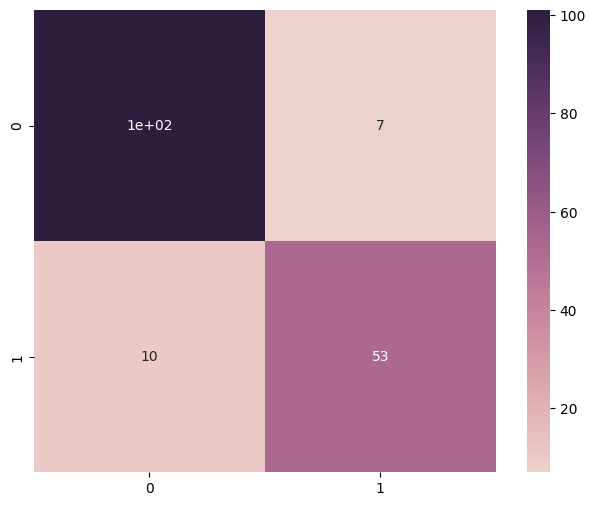

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred),
            annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True),
            square=True)

This is a very powerful tool to utilize to more deeply understand our accuracy and performance, as this tells us the precise ways that our model was successful or unsuccessful, and ultimately informs us to ways we can try and improve our model.

Finally, we can utilize classification reports as a final means of assessing accuracy metrics across our model.

Many of these metrics are not critically important at this time, but will become _very_ important the deeper we go into this course; as such, this is still an important skill to have in your toolkit.

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           B       0.91      0.94      0.92       108
           M       0.88      0.84      0.86        63

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



Overall, our kNN has performed pretty adequately!

Let's see if our "smarter model" -- our Support Vector Machine -- can't perform better!

---

You'll probably recognize that despite a uniquely different model, our process appears largely the same.

Still, let's go through it one step at a time just to get the practice!

For starters, let's instantiate our algorithm.

In [ ]:
classifier_svm = SVC()

Now that our algorithm is declared, let's fit it to our relevant training data segments.

Note that we don't have to perform the actual data splitting step again since it's already been performed prior to instantiating any model.

In [ ]:
classifier_svm.fit(X_train, y_train)

SVC()

With our model fitted to our training data, we should be ready to run some predictions!

In [ ]:
y_pred = classifier_svm.predict(X_test)

Like with our kNN example, we've gone ahead and saved our predicted labels to assess accuracy and reliability of our model.

Let's check our basic accuracy first!

In [ ]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8888888888888888

Hmm... there's definitely room for improvement though -- let's take a closer look at our confusion matrix to see our model's strengths and weaknesses.

<Axes: >

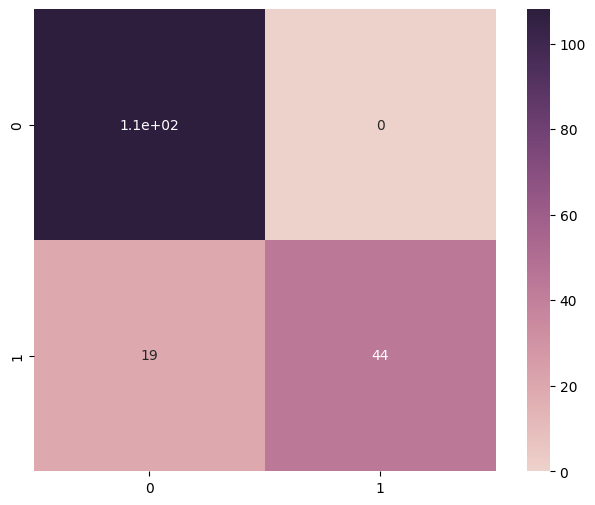

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred),
            annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True),
            square=True)

It should look _very_ similar to our results from our kNN -- though surprisingly, our kNN ended up performing better!

Ultimately, while our results are good, the true power of the SVM is wasted on such a small dataset.

That being said, still a strong starting point for applying these algorithms for real-world practice!

Finally, let's take a look at our classification report to get a better understanding for our specialized accuracy scores.

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           B       0.85      1.00      0.92       108
           M       1.00      0.70      0.82        63

    accuracy                           0.89       171
   macro avg       0.93      0.85      0.87       171
weighted avg       0.91      0.89      0.88       171



Again, many of these values will make more sense the further we progress in the course.

However, it is worth mentioning that our performance for both models is very good.

That being said, there's always room for improvement!

**Given what you know so far, what methods and steps would you take to try and improve the accuracy of either algorithm?**

---
---
---